# Code for EXL EQ Case Challenge

In [1]:
# data analysis and wrangling 
import pandas as pd
import numpy as np
import random as rnd

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler as UnderSampler
from sklearn import preprocessing

In [4]:
data_df = pd.read_csv('Dataset.csv', encoding='utf-8')
test_df = pd.read_csv('Test.csv', encoding='utf-8')
combine = [data_df, test_df]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
Month                   11565 non-null object
WeekOfMonth             11565 non-null int64
DayOfWeek               11565 non-null object
Make                    11565 non-null object
AccidentArea            11565 non-null object
DayOfWeekClaimed        11565 non-null object
MonthClaimed            11565 non-null object
WeekOfMonthClaimed      11565 non-null int64
Sex                     11565 non-null object
MaritalStatus           11565 non-null object
Age                     11560 non-null float64
Fault                   11565 non-null object
PolicyType              11565 non-null object
VehicleCategory         11565 non-null object
VehiclePrice            11565 non-null object
FraudFound_P            11565 non-null int64
PolicyNumber            11565 non-null int64
RepNumber               11565 non-null int64
Deductible              11565 non-null int64
DriverRating          

In [5]:
data_df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [6]:
print("Before", data_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
data_df = data_df.drop(['PolicyNumber'], axis=1)
test_df = test_df.drop(['PolicyNumber'], axis=1)
combine = [data_df, test_df]
"After", data_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (11565, 34) (3855, 33) (11565, 34) (3855, 33)


('After', (11565, 33), (3855, 32), (11565, 33), (3855, 32))

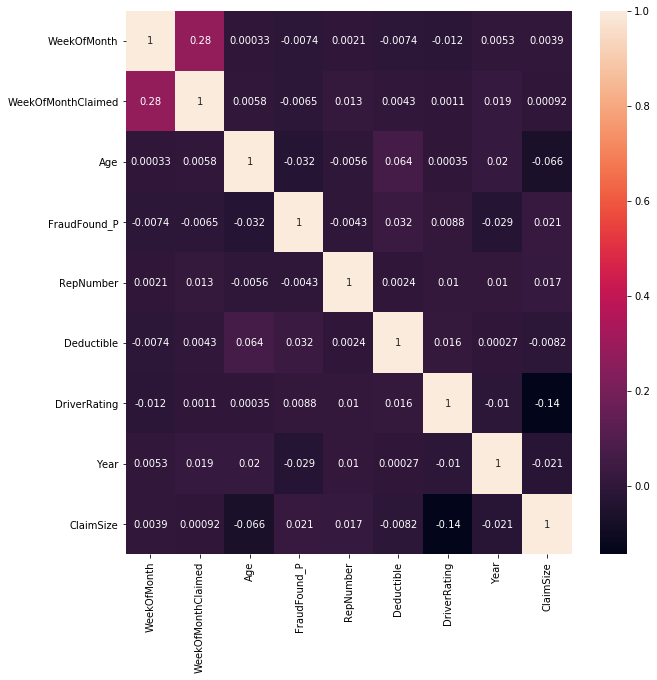

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_df.corr(), annot=True, ax=ax)

In [8]:


# Drop Rows with missing values
data_df = data_df.dropna()
combine = [data_df, test_df]
data_df.describe()
# data_df.shape

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000
mean,2.784231,2.701142,39.899342,0.059287,8.470313,407.625065,2.493336,1994.865847,22969.869228
std,1.284882,1.258195,13.591600,0.236171,4.619424,43.417411,1.118140,0.801737,26997.045641
min,1.000000,1.000000,0.000000,0.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,8.000000,400.000000,2.000000,1995.000000,8131.216984
75%,4.000000,4.000000,49.000000,0.000000,12.000000,400.000000,3.000000,1996.000000,46490.043270
max,5.000000,5.000000,80.000000,1.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [9]:
# data_df['AgeBand'] = pd.cut(data_df['Age'], 5)
# data_df[['AgeBand', 'FraudFound_P']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

# for dataset in combine:    
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
# data_df.Age.unique()


In [10]:
#  for dataset in combine:    
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
# data_df.Age.unique()

In [11]:
data_df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000,11554.000000
mean,2.784231,2.701142,39.899342,0.059287,8.470313,407.625065,2.493336,1994.865847,22969.869228
std,1.284882,1.258195,13.591600,0.236171,4.619424,43.417411,1.118140,0.801737,26997.045641
min,1.000000,1.000000,0.000000,0.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,8.000000,400.000000,2.000000,1995.000000,8131.216984
75%,4.000000,4.000000,49.000000,0.000000,12.000000,400.000000,3.000000,1996.000000,46490.043270
max,5.000000,5.000000,80.000000,1.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [12]:
# data_df = data_df.drop(['AgeBand'], axis=1)
# combine = [data_df, test_df]
# data_df.head()

In [13]:
# Conversion of Sex to numeric
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({ 'Female': 1, 'Male': 0}).astype(int)
    
data_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,1,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,0,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,0,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,0,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,0,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [14]:
# Month to numeric
for dataset in combine:
    dataset['Month'] = dataset['Month'].map({ 'Jan': 1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}).astype(int)
    
data_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,Wednesday,Honda,Urban,Tuesday,Jan,1,1,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,1,3,Wednesday,Honda,Urban,Monday,Jan,4,0,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,10,5,Friday,Honda,Urban,Thursday,Nov,2,0,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,6,2,Saturday,Toyota,Rural,Friday,Jul,1,0,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,2,1,Saturday,Honda,Urban,Monday,Feb,3,0,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [15]:
# DayOfWeek to numeric
for dataset in combine:
    dataset['DayOfWeek'] = dataset['DayOfWeek'].map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int)
    
data_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,3,Honda,Urban,Tuesday,Jan,1,1,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,1,3,3,Honda,Urban,Monday,Jan,4,0,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,10,5,5,Honda,Urban,Thursday,Nov,2,0,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,6,2,6,Toyota,Rural,Friday,Jul,1,0,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,2,1,6,Honda,Urban,Monday,Feb,3,0,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [16]:
data_df['Make'].unique()
makeDict = {}
i=1
for item in data_df['Make'].unique():
    makeDict[item]=i
    i+=1
for dataset in combine:
    dataset['Make'] = dataset['Make'].map(makeDict).astype(int)
data_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,3,1,Urban,Tuesday,Jan,1,1,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,1,3,3,1,Urban,Monday,Jan,4,0,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,10,5,5,1,Urban,Thursday,Nov,2,0,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,6,2,6,2,Rural,Friday,Jul,1,0,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,2,1,6,1,Urban,Monday,Feb,3,0,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [17]:
# data_df.drop([data_df.DayOfWeekClaimed == 0])

# # DayOfWeek to numeric
# for dataset in combine:
#     dataset['DayOfWeekClaimed'] = dataset['DayOfWeekClaimed'].map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int)
    
# data_df.head()

arr = data_df.index[data_df['DayOfWeekClaimed']=='0'].tolist()
data_df = data_df.drop(arr)
data_df.describe()
# data_df['DayOfWeekClaimed'].unique()



,Month,WeekOfMonth,DayOfWeek,Make,WeekOfMonthClaimed,Sex,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11553.000000,11553.000000,11553.000000,11553.000000,11553.00000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000
mean,6.411235,2.784298,3.804813,3.949623,2.70129,0.155371,39.902796,0.059292,8.469748,407.625725,2.493378,1994.865922,22965.752481
std,3.475095,1.284916,1.989125,2.617341,1.25815,0.362274,13.587117,0.236181,4.619224,43.419232,1.118179,0.801731,26994.587160
min,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,3.000000,2.000000,2.000000,2.000000,2.00000,0.000000,31.000000,0.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,6.000000,3.000000,4.000000,3.000000,3.00000,0.000000,38.000000,0.000000,8.000000,400.000000,2.000000,1995.000000,8131.216984
75%,9.000000,4.000000,5.000000,6.000000,4.00000,0.000000,49.000000,0.000000,12.000000,400.000000,3.000000,1996.000000,46490.043270
max,12.000000,5.000000,7.000000,19.000000,5.00000,1.000000,80.000000,1.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [18]:
# data_df = data_df['DayOfWeekClaimed'].fillna(0).astype('category')

# # DayOfWeek to numeric
# for dataset in combine:
#     dataset['DayOfWeekClaimed'] = (dataset['DayOfWeekClaimed']).map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int)
 

# data_df.head()
# data_df['DayOfWeekClaimed'].unique()
# data_df['DayOfWeekClaimed'].isnull().sum()
# (~np.isfinite(data_df['DayOfWeekClaimed'])).sum()
# data_df['DayOfWeekClaimed'].unique()
# list(data_df.columns.values)
# data_df.info()
# data_df = data_df[:11553]
# # data_df = data_df[:5]
# data_df
# for i in range(11550):
#     print(data_df['DayOfWeekClaimed'][i])

# data_df.index = range(data_df.shape[0])
# # data_df
# for i in range(11553):
#     print(data_df['DayOfWeekClaimed'][i])
# print(data_df.reindex(range(data_df.shape[0])))
# data_df
# try:
#     for dataset in combine:
#         dataset['DayOfWeekClaimed'] = dataset['DayOfWeekClaimed'].map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int)
# except:
#     pass
        # data_df['DayOfWeekClaimed'] = data_df['DayOfWeekClaimed'].map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int) 
# try:
#     for i in range(data_df.shape[0]):
#         data_df['DayOfWeekClaimed'][i] = (data_df['DayOfWeekClaimed'][i]).map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int) 
# except:
#     pass
# for i in range(data_df.shape[0]):
#     data_df['DayOfWeekClaimed'][i] = (data_df['DayOfWeekClaimed'][i]).map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int) 
data_df['DayOfWeekClaimed'] = (data_df['DayOfWeekClaimed']).map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int) 
test_df['DayOfWeekClaimed'] = (test_df['DayOfWeekClaimed']).map({ 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}).astype(int) 
combine = [data_df, test_df]
# print(type(data_df))
# print(type(data_df['DayOfWeekClaimed']))
# print(type(data_df['DayOfWeekClaimed'][0]))
# print(data_df['DayOfWeekClaimed'][10])
# for i in range(11500, 11553):
#     print(data_df['DayOfWeekClaimed'][i])

In [19]:
len(data_df['MonthClaimed'].unique())
monthDict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
for dataset in combine:
    dataset['MonthClaimed'] = dataset['MonthClaimed'].map(monthDict).astype(int)

In [20]:
monthDict['Jan']

1

In [21]:
data_df['MaritalStatus'].unique()
mstatDict ={'Single':1, 'Married':2, 'Divorced':3, 'Widow':4}
for dataset in combine:
    dataset['MaritalStatus'] = dataset['MaritalStatus'].map(mstatDict).astype(int)
data_df['MaritalStatus'].unique()

array([1, 2, 4, 3])

In [22]:
data_df['Fault'].unique()
for dataset in combine:
    dataset['Fault'] = dataset['Fault'].map({'Policy Holder':1, 'Third Party':2}).astype(int)
data_df['Fault'].unique()


array([1, 2])

In [23]:
data_df['PolicyType'].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Sedan - All Perils', 'Sedan - Collision', 'Utility - Collision',
       'Utility - Liability', 'Utility - All Perils',
       'Sport - All Perils'], dtype=object)

In [24]:
ptypearr = data_df['PolicyType'].unique()
policyTypeDict = {}
i=1
for item in ptypearr:
    policyTypeDict[item]=i
    i+=1
for dataset in combine:
    dataset['PolicyType'] = dataset['PolicyType'].map(policyTypeDict).astype(int)
data_df['PolicyType'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
data_df['VehicleCategory'].unique()
for dataset in combine:
    dataset['VehicleCategory'] = dataset['VehicleCategory'].map({'Sport':1, 'Sedan':2, 'Utility':3}).astype(int)
data_df['VehicleCategory'].unique()

array([1, 2, 3])

In [26]:
data_df['VehiclePrice'].unique()
vpricedict = {
    'less than 20000':15000,
    '20000 to 29000':24500,
    '30000 to 39000':34500,
    '40000 to 59000':48500,
    '60000 to 69000':64500,
    'more than 69000':75000
}
for dataset in combine:
    dataset['VehiclePrice'] = dataset['VehiclePrice'].map(vpricedict).astype(int)
data_df['VehiclePrice'].unique()

array([75000, 24500, 34500, 15000, 48500, 64500])

In [27]:
data_df['Days_Policy_Accident'].unique()
dpadict = {
    'none':0,
    '1 to 7':1,
    '8 to 15':2,
    '15 to 30':3,
    'more than 30':4
}
for dataset in combine:
    dataset['Days_Policy_Accident'] = dataset['Days_Policy_Accident'].map(dpadict).astype(int)
data_df['Days_Policy_Accident'].unique()

array([4, 3, 0, 1, 2])

In [28]:
data_df['Days_Policy_Claim'].unique()
for dataset in combine:
    dataset['Days_Policy_Claim'] = dataset['Days_Policy_Claim'].map(dpadict).astype(int)
data_df['Days_Policy_Claim'].unique()

array([4, 3, 2])

In [29]:
data_df['PastNumberOfClaims'].unique()
pastdaysdict = {
    'none':0,
    '1':1,
    '2 to 4':2,
    'more than 4':3
}
for dataset in combine:
    dataset['PastNumberOfClaims'] = dataset['PastNumberOfClaims'].map(pastdaysdict).astype(int)
data_df['PastNumberOfClaims'].unique()

array([0, 1, 2, 3])

In [30]:
data_df['AgeOfVehicle'].unique()
agevehicledict = {
    'new':0,
    '2 years':1,
    '3 years':2,
    '4 years':3,
    '5 years':4,
    '6 years':5,
    '7 years':6,
    'more than 7':7
}
for dataset in combine:
    dataset['AgeOfVehicle'] = dataset['AgeOfVehicle'].map(agevehicledict).astype(int)
data_df['AgeOfVehicle'].unique()

array([2, 5, 6, 7, 0, 4, 3, 1])

In [31]:
data_df['AgeOfPolicyHolder'].unique()
ageofphdict = {
    '16 to 17':0,
    '18 to 20':1,
    '21 to 25':2,
    '26 to 30':3,
    '31 to 35':4,
    '36 to 40':5,
    '41 to 50':6,
    '51 to 65':7,
    'over 65':8
}
for dataset in combine:
    dataset['AgeOfPolicyHolder'] = dataset['AgeOfPolicyHolder'].map(ageofphdict).astype(int)
data_df['AgeOfPolicyHolder'].unique()

array([3, 4, 6, 7, 5, 8, 0, 1, 2])

In [32]:
data_df['PoliceReportFiled'].unique()
yesnodict={
    'Yes':1,
    'No':0
}
for dataset in combine:
    dataset['PoliceReportFiled'] = dataset['PoliceReportFiled'].map(yesnodict).astype(int)
data_df['PoliceReportFiled'].unique()

array([0, 1])

In [33]:
data_df['WitnessPresent'].unique()
for dataset in combine:
    dataset['WitnessPresent'] = dataset['WitnessPresent'].map(yesnodict).astype(int)
data_df['WitnessPresent'].unique()

array([0, 1])

In [34]:
data_df['AgentType'].unique()
for dataset in combine:
    dataset['AgentType'] = dataset['AgentType'].map({'External':1, 'Internal':2}).astype(int)
data_df['AgentType'].unique()

array([1, 2])

In [35]:
data_df['NumberOfSuppliments'].unique()
suppdict = {
    'none':0,
    '1 to 2':1,
    '3 to 5': 2,
    'more than 5':3
}
for dataset in combine:
    dataset['NumberOfSuppliments'] = dataset['NumberOfSuppliments'].map(suppdict).astype(int)
data_df['NumberOfSuppliments'].unique()

array([0, 3, 1, 2])

In [36]:
data_df['AddressChange_Claim'].unique()
addchangedict={
    'under 6 months':1,
    'no change':0,
    '1 year':2,
    '2 to 3 years':3,
    '4 to 8 years':4
}
for dataset in combine:
    dataset['AddressChange_Claim'] = dataset['AddressChange_Claim'].map(addchangedict).astype(int)
data_df['AddressChange_Claim'].unique()

array([2, 0, 4, 3, 1])

In [37]:
data_df['NumberOfCars'].unique()
nocarsdict={
    '1 vehicle':0,
    '2 vehicles':1,
    '3 to 4':2,
    '5 to 8':3,
    'more than 8':4
}
for dataset in combine:
    dataset['NumberOfCars'] = dataset['NumberOfCars'].map(nocarsdict).astype(int)
data_df['NumberOfCars'].unique()

array([2, 0, 1, 3, 4])

In [38]:
data_df['Year'].unique()

array([1994, 1995, 1996])

In [39]:
data_df['BasePolicy'].unique()
for dataset in combine:
    dataset['BasePolicy'] = dataset['BasePolicy'].map({'Liability':1, 'Collision':2, 'All Perils':3}).astype(int)
data_df['BasePolicy'].unique()

array([1, 2, 3])

In [40]:
data_df['AccidentArea'].unique()
for dataset in combine:
    dataset['AccidentArea'] = dataset['AccidentArea'].map({'Urban':1, 'Rural':2}).astype(int)
data_df['AccidentArea'].unique()

array([1, 2])

In [41]:
test_df['ClaimSize'] = test_df['ClaimSize'].str.replace(",","").astype(float)
# test_df['ClaimSize'].head()
combine = [data_df, test_df]

In [42]:
# test_df.info()
data_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,3,1,1,2,1,1,1,1,...,3,0,0,1,0,2,2,1994,1,55526.069421
1,1,3,3,1,1,1,1,4,0,1,...,4,1,0,1,0,0,0,1994,2,59294.455571
2,10,5,5,1,1,4,11,2,0,2,...,6,0,0,1,0,0,0,1994,2,71756.941320
3,6,2,6,2,2,5,7,1,0,2,...,7,1,0,1,3,0,0,1994,1,7584.153493
4,2,1,6,1,1,1,2,3,0,2,...,5,0,0,1,1,0,0,1994,2,98545.374339


In [43]:
# data_df = (data_df-data_df.mean())/data_df.std()
# test_df = (test_df-test_df.mean())/test_df.std()


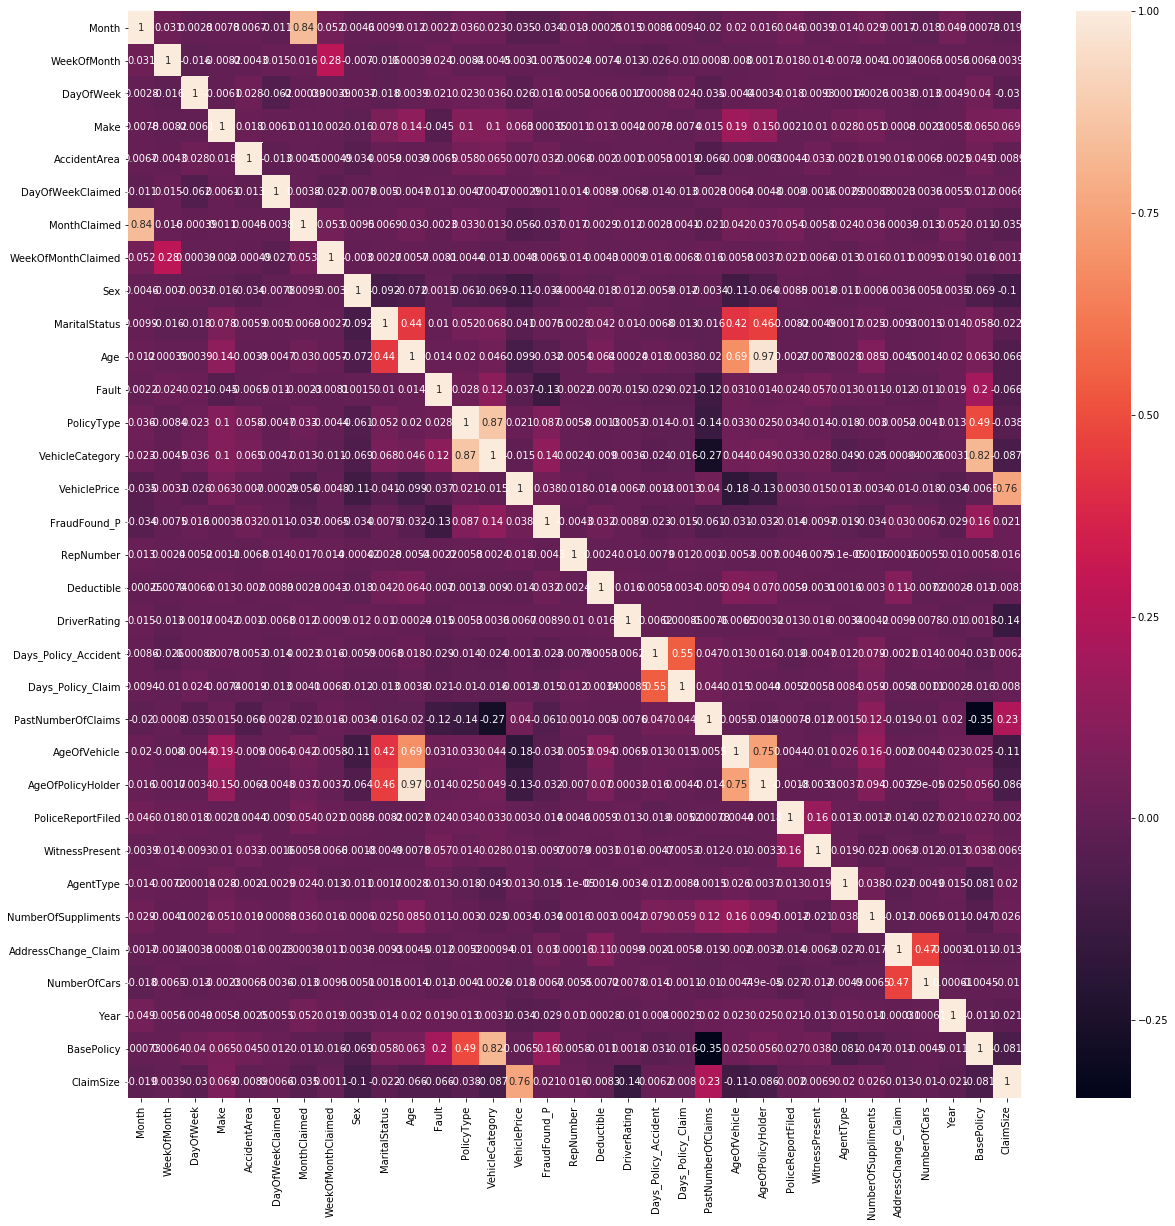

In [44]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), annot=True, ax=ax)

In [45]:
data_df = data_df.drop(['AgeOfPolicyHolder', 'AddressChange_Claim', 'BasePolicy','VehicleCategory'], axis=1)
test_df = test_df.drop(['AgeOfPolicyHolder', 'AddressChange_Claim', 'BasePolicy','VehicleCategory'], axis=1)

In [46]:
data_df['AccidentDay'] = 0
test_df['AccidentDay'] = 0
data_df['ClaimDay'] = 0
test_df['ClaimDay'] = 0
init_1994 = 5
init_1995 = 6
init_1996 = 0
init_1997 = 2
numdays = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
numdaysleap = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayDict = { 'Monday': 0, 'Tuesday': 1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6};
startday_1994 = [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
startday_1995 = [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
startday_1996 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
startday_1997 = [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
data_df.index = range(len(data_df))
# Calculating start days for 1994 and 1995
cum=0
for i in range(1,12):
    cum+=numdays[i-1]
    startday_1994[i] = ((cum%7)+init_1994)%7
    startday_1995[i] = ((cum)%7+init_1995)%7
    startday_1997[i] = ((cum)%7+init_1997)%7

# Calculating start days for 1996
cum=0
for i in range(1,12):
    cum+=numdaysleap[i-1]
    startday_1996[i] = ((cum%7)+init_1996)%7

print(startday_1994)
# for i in range(0, len(data_df)):
#     item = data_df[i:i+1]
#     # 1994
#     if((item['Year']==1994)[i]):
#         item['AccidentDay'][i] = 7-(startday_1994[item['Month'][i]-1] - (item['DayOfWeek'][i]-1))%7 + (item['WeekOfMonth'][i]-1)*7 + 1
#     #1995
#     elif((item['Year']==1995)[i]):
#         item['AccidentDay'][i] = 7-(startday_1995[item['Month'][i]-1] - (item['DayOfWeek'][i]-1))%7 + (item['WeekOfMonth'][i]-1)*7 + 1
#     #1996
#     else:
#         item['AccidentDay'][i] = 7-(startday_1996[item['Month'][i]-1] - (item['DayOfWeek'][i]-1))%7 + (item['WeekOfMonth'][i]-1)*7 + 1

def claimDayFunc(month, day, week, year, monthacc):
    if(year==1994):
        if(int(monthacc)>int(month)):
            pp1 = 7-(startday_1995[int(month)] - (day-1))%7 + (week-1)*7 + 1
        else:
            pp1 = 7-(startday_1994[int(month-1)] - (day-1))%7 + (week-1)*7 + 1
        if(pp1>31):
            pp1 = pp1-7
    elif(year==1995):
        if(int(monthacc)>int(month)):
            pp1 = 7-(startday_1996[int(month)] - (day-1))%7 + (week-1)*7 + 1
        else:
            pp1 = 7-(startday_1995[int(month-1)] - (day-1))%7 + (week-1)*7 + 1
        if(pp1>31):
            pp1 = pp1-7
    else:
        if(int(monthacc)>int(month)):
            pp1 = 7-(startday_1997[int(month)] - (day-1))%7 + (week-1)*7 + 1
        else:
            pp1 = 7-(startday_1996[int(month-1)] - (day-1))%7 + (week-1)*7 + 1
        if(pp1>31):
            pp1 = pp1-7
    return pp1

def accidentDayFunc(month, day, week, year):
    if(year==1994):
        pp = 7-(startday_1994[int(month-1)] - (day-1))%7 + (week-1)*7 + 1
        if(pp>31):
            pp = pp-7
    #1995
    elif((year==1995)):
        pp = 7-(startday_1995[int(month-1)] - (day-1))%7 + (week-1)*7 + 1
        if(pp>31):
            pp = pp-7
       
    #1996
    else:
        pp = 7-(startday_1996[int(month-1)] - (day-1))%7 + (week-1)*7 + 1
        if(pp>31):
            pp = pp-7
    return pp


data_df['AccidentDay'] = data_df.apply(lambda row: accidentDayFunc(row['Month'], row['DayOfWeek'], row['WeekOfMonth'], row['Year']), axis=1)
data_df['ClaimDay'] = data_df.apply(lambda row: claimDayFunc(row['MonthClaimed'], row['DayOfWeekClaimed'], row['WeekOfMonthClaimed'], row['Year'], row['Month']), axis=1)

test_df['AccidentDay'] = test_df.apply(lambda row: accidentDayFunc(row['Month'], row['DayOfWeek'], row['WeekOfMonth'], row['Year']), axis=1)
test_df['ClaimDay'] = test_df.apply(lambda row: claimDayFunc(row['MonthClaimed'], row['DayOfWeekClaimed'], row['WeekOfMonthClaimed'], row['Year'], row['Month']), axis=1)


# for index, row in data_df.iterrows():
# #     item = data_df[i:i+1]
# #     df['AccidentDay'] = df.apply(lambda row: valuation_formula(row['x'], row['y']), axis=1)
#     # 1994
#     type(row)
# #     df['c1'].loc[df['c1'] == 'Value'] = 10
#     if(row['Year']==1994):
#         pp = 7-(startday_1994[int(row['Month']-1)] - (row['DayOfWeek']-1))%7 + (row['WeekOfMonth']-1)*7 + 1
#         if(int(row['Month'])>int(row['MonthClaimed'])):
#             pp1 = 7-(startday_1995[int(row['MonthClaimed']-1)] - (row['DayOfWeekClaimed']-1))%7 + (row['WeekOfMonthClaimed']-1)*7 + 1
#         else:
#             pp1 = 7-(startday_1994[int(row['MonthClaimed']-1)] - (row['DayOfWeekClaimed']-1))%7 + (row['WeekOfMonthClaimed']-1)*7 + 1
#         if(pp1>31):
#             pp1 = pp1-7
#         if(pp>31):
#             pp = pp-7
# #         print(pp)
# #         row['ClaimDay'] = pp1
#         row['AccidentDay'] = pp
#     #1995
#     elif((row['Year']==1995)):
#         pp = 7-(startday_1995[int(row['Month']-1)] - (row['DayOfWeek']-1))%7 + (row['WeekOfMonth']-1)*7 + 1
#         if(int(row['Month'])>int(row['MonthClaimed'])):
#             pp1 = 7-(startday_1996[int(row['MonthClaimed']-1)] - (row['DayOfWeekClaimed']-1))%7 + (row['WeekOfMonthClaimed']-1)*7 + 1
#         else:
#             pp1 = 7-(startday_1995[int(row['MonthClaimed']-1)] - (row['DayOfWeekClaimed']-1))%7 + (row['WeekOfMonthClaimed']-1)*7 + 1
#         if(pp1>31):
#             pp1 = pp1-7
#         if(pp>31):
#             pp = pp-7
#         row['ClaimDay'] = pp1
#         row['AccidentDay'] = pp
       
#     #1996
#     else:
#         pp=7-(startday_1996[int(row['Month']-1)] - (row['DayOfWeek']-1))%7 + (row['WeekOfMonth']-1)*7 + 1
#         if(int(row['Month'])>int(row['MonthClaimed'])):
#             pp1 = 7-(startday_1997[int(row['MonthClaimed']-1)] - (row['DayOfWeekClaimed']-1))%7 + (row['WeekOfMonthClaimed']-1)*7 + 1
#         else:
#             pp1 = 7-(startday_1996[int(row['MonthClaimed']-1)] - (row['DayOfWeekClaimed']-1))%7 + (row['WeekOfMonthClaimed']-1)*7 + 1
#         if(pp1>31):
#             pp1 = pp1-7
#         if(pp>31):
#             pp = pp-7
#         row['ClaimDay'] = pp1
#         row['AccidentDay'] = pp

    
# print(data_df['AccidentDay'].unique())
# print(data_df['ClaimDay'].unique())



[5, 1, 1, 4, 6, 2, 4, 0, 3, 5, 1, 3]


In [47]:
# data_df = data_df.astype({"AccidentDay":int, "Year":int, "Month":int})
# data_df['AccidentDate'] = pd.to_datetime((data_df.Year*10000+data_df.Month*100+data_df.AccidentDay).apply(str),format='%Y%m%d')

data_df['DaySum']=0
test_df['DaySum']=0
def calculateDays(month, year, accday, monthc, claimday):
    month = int(month)
    year = int(year)
    accday = int(accday)
    monthc = int(monthc)
    claimday = int(claimday)
    counter =0
    i=int(month)%12
    if year==1995 and monthc<month:
        if abs(int(monthc)-int(month))>1:
            while True:
                counter += numdaysleap[i]
                i+=1
                i%=12
                if(i==monthc-1):
                    break
        counter+= numdaysleap[month-1] - accday + claimday
    else:
        if abs((int(monthc)%12)-(int(month)%12))>1:
            while True:
                counter += numdays[i]
                i+=1
                i%=12
                if(i==monthc-1):
                    break
        counter+= numdays[month-1] - accday + claimday
    return counter
            

data_df['DaySum'] = data_df.apply(lambda row: calculateDays(row['Month'], row['Year'], row['AccidentDay'], row['MonthClaimed'], row['ClaimDay']), axis=1)

test_df['DaySum'] = test_df.apply(lambda row: calculateDays(row['Month'], row['Year'], row['AccidentDay'], row['MonthClaimed'], row['ClaimDay']), axis=1)

data_df['DaySum'].head()


0    10
1    36
2    13
3    27
4    44
Name: DaySum, dtype: int64

In [48]:
# item = data_df[3:4][:]
# type(item['Year'])
# x = (item['Year']==1994)[3]
# if((item['Year']==1994)[3]):
#     print('maaro')
# item['AccidentDay'][3]
# data_df.head()
# for index, row in data_df.iterrows():
#     print(int(row['Month']-1))
# data_df['AccidentDay'].loc[df['Year'] == 1994] = 10

# df.apply(lambda x: 10 if x['c1'] == 'Value' else x['c3'],axis=1)
# data_df.loc[data.df['Year'] == 1994, 'AccidentDay'] = 7-(startday_1994[data_df['Month']-1] - (data_df['DayOfWeek']-1))%7 + (data_df['WeekOfMonth']-1)*7 + 1
# data_df['AccidentDay'] = data_df['Year'].apply(lambda x: 10 if x == 'Value' else x)


In [49]:
cols_to_norm = ['ClaimSize', 'Age', 'VehiclePrice', 'DaySum']
data_df[cols_to_norm] = data_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
test_df[cols_to_norm] = test_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [50]:
data_df = data_df.drop(['Month', 'Year', 'WeekOfMonth','DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'AccidentDay', 'ClaimDay'], axis=1)
test_df = test_df.drop(['Month', 'Year', 'WeekOfMonth','DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'AccidentDay', 'ClaimDay'], axis=1)

In [51]:
data_df.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,FraudFound_P,RepNumber,...,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,NumberOfCars,ClaimSize,DaySum
0,1,1,1,1,0.2625,1,1,1.000000,0,12,...,4,0,2,0,0,1,0,2,0.392704,0.021635
1,1,1,0,1,0.4250,1,2,1.000000,0,15,...,4,0,5,1,0,1,0,0,0.419356,0.084135
2,1,1,0,2,0.5875,1,2,1.000000,0,7,...,4,1,6,0,0,1,0,0,0.507496,0.028846
3,2,2,0,2,0.8125,2,3,0.158333,0,4,...,4,1,7,1,0,1,3,0,0.053638,0.062500
4,1,1,0,2,0.4500,2,2,1.000000,0,14,...,4,1,6,0,0,1,1,0,0.696955,0.103365


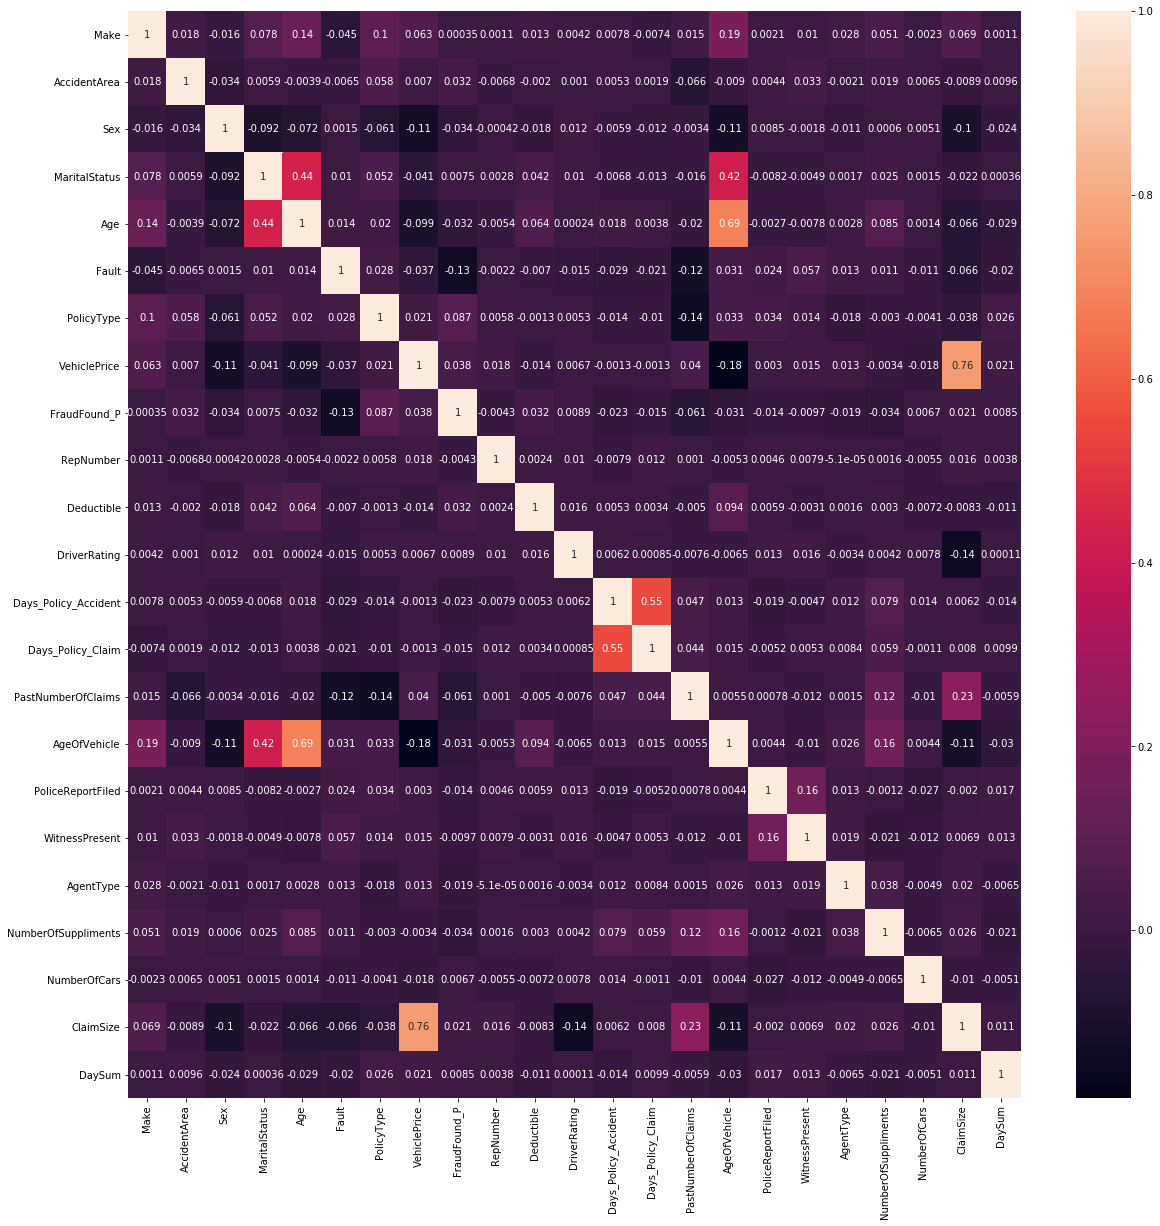

In [81]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), annot=True, ax=ax)

In [52]:
################################################################
### MODEL AND PREDICTION #######################################
################################################################

In [53]:
X_train_i = data_df.drop('FraudFound_P', axis=1)
Y_train_i = data_df['FraudFound_P']
# X_train_i = (X_train_i-X_train_i.mean())/X_train_i.std()
# X_train, X_test, Y_train, Y_test = train_test_split(X_train_i, Y_train_i, random_state=0, test_size=0.3)
X_train, X_test, Y_train, Y_test = train_test_split(X_train_i, Y_train_i, stratify=Y_train_i)
X_test_final = test_df
# X_test_final = (X_test_final-X_test_final.mean())/X_test_final.std()
# X_train.shape, Y_train.shape, X_test.shape
Y_train.sum()/len(Y_train), Y_test.sum()/len(Y_test)

(0.05932594644506002, 0.059190031152647975)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [55]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier()
parameters = {"n_estimators": list(range(10, 60))}
fitmodel = GridSearchCV(AdaBoost, param_grid=parameters, cv=5, scoring="f1",)
fitmodel.fit(X_train, Y_train)
##fitmodel.best_estimator_, fitmodel.grid_scores_,
fitmodel.best_params_, fitmodel.best_score_

/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha

({'n_estimators': 59}, 0.03169590709986328)

In [56]:
AdaBoost=AdaBoostClassifier(n_estimators=fitmodel.best_params_['n_estimators'])   
AdaBoost.fit(X_train, Y_train)
Y_pred = AdaBoost.predict(X_test_final)
np.savetxt("yPred.csv", Y_pred, delimiter=",")

print ("Training :"+str(accuracy_score( Y_train, AdaBoost.predict(X_train))))
print ("Test :"+str(accuracy_score( Y_test, AdaBoost.predict(X_test))))


Training :0.9372114496768237
Test :0.9373485635167879


In [57]:
from xgboost import XGBClassifier
Xgboost=XGBClassifier(learning_rate=0.01)   
Xgboost.fit(X_train, Y_train)

print ("Training :"+str(accuracy_score( Y_train, Xgboost.predict(X_train))))
print ("Test :"+str(accuracy_score( Y_test, Xgboost.predict(X_test))))

Training :0.9406740535549399
Test :0.940809968847352


In [58]:
confusion_matrix(Y_test, Xgboost.predict(X_test))

array([[2718,    0],
       [ 171,    0]])

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, AdaBoost.predict(X_test))

array([[2707,   11],
       [ 170,    1]])

In [60]:
########### ADABOOST WITH SAMPLING ###############
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
cc = RandomUnderSampler(random_state=0)
X_sample, Y_sample = cc.fit_resample(X_train, Y_train)


In [61]:
AdaBoost1 = AdaBoostClassifier(n_estimators=40)   
AdaBoost1.fit(X_sample, Y_sample)
confusion_matrix(Y_test, AdaBoost1.predict(X_test))

array([[1683, 1035],
       [  17,  154]])

In [62]:
## Logistic Regression
# logreg = LogisticRegression()
# logreg.fit(X_train_i, Y_train_i)
# Y_pred = logreg.predict(X_test_final)
# acc_log = round(logreg.score(X_train_i, Y_train_i)*100, 2)
# print(acc_log)
# scores = cross_val_score(logreg, X_train_i, Y_train_i, cv=6)
# print “Cross-validated scores:”, scores
# accuracy = metrics.r2_score(Y_train_i, Y_pred)
# print “Cross-Predicted Accuracy:”, accuracy

Logistic=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(Logistic, param_grid=parameters, cv=5, scoring="f1")
fitmodel.fit(X_train, Y_train)
##fitmodel.best_estimator_, fitmodel.grid_scores_,
fitmodel.best_params_, fitmodel.best_score_

/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-

/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_en

/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_en

({'C': 0.0001}, 0.0)

In [63]:
Logistic=LogisticRegression(C=fitmodel.best_params_['C'])
Logistic.fit(X_train, Y_train)

print ("Training :"+str(accuracy_score( Y_train, Logistic.predict(X_train))))
print ("Test :"+str(accuracy_score( Y_test, Logistic.predict(X_test))))

Training :0.9406740535549399
Test :0.940809968847352


/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Logistic.predict(X_test))

array([[2718,    0],
       [ 171,    0]])

In [65]:
# # Support Vector Machine
# svc = SVC(class_weight="balanced")
# svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
# # acc_svc= round(svc.score(X_train_i, Y_train_i)*100, 2)
# # acc_svc
# f1_score(Y_test, Y_pred, average=None)
# scores = cross_val_score(svc, X_train_i, Y_train_i, cv=6)
# print “Cross-validated scores:”, scores
# accuracy = metrics.r2_score(Y_train_i, Y_pred)
# print “Cross-Predicted Accuracy:”, accuracy

In [66]:
# # KNN
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train_i, Y_train_i)
# Y_pred = knn.predict(X_test_final)
# # acc_knn = round(knn.score(X_test, Y_test)*100, 2)
# # acc_knn
# scores = cross_val_score(knn, X_train_i, Y_train_i, cv=6)
# print “Cross-validated scores:”, scores
# accuracy = metrics.r2_score(Y_train_i, Y_pred)
# print “Cross-Predicted Accuracy:”, accuracy

In [67]:
# # Gaussian Naive Bayes

# gaussian = GaussianNB()
# gaussian.fit(X_train_i, Y_train_i)
# Y_pred = gaussian.predict(X_test_final)
# # acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
# # acc_gaussian
# scores = cross_val_score(gaussian, X_train_i, Y_train_i, cv=6)
# print “Cross-validated scores:”, scores
# accuracy = metrics.r2_score(Y_train_i, Y_pred)
# print “Cross-Predicted Accuracy:”, accuracy

In [68]:
# # Perceptron

# perceptron = Perceptron()
# perceptron.fit(X_train_i, Y_train_i)
# Y_pred = perceptron.predict(X_test_final)
# acc_perceptron = round(perceptron.score(X_train_i, Y_train_i) * 100, 2)
# acc_perceptron
# scores = cross_val_score(perceptron, X_train_i, Y_train_i, cv=6)
# print “Cross-validated scores:”, scores
# accuracy = metrics.r2_score(Y_train_i, Y_pred)
# print “Cross-Predicted Accuracy:”, accuracy

In [69]:
# Linear SVC

# linear_svc = LinearSVC()
# linear_svc.fit(X_train_i, Y_train_i)
# Y_pred = linear_svc.predict(X_test_final)
# # acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
# # acc_linear_svc
# scores = cross_val_score(linear_svc, X_train_i, Y_train_i, cv=6)
# print “Cross-validated scores:”, scores
# accuracy = metrics.r2_score(Y_train_i, Y_pred)
# print “Cross-Predicted Accuracy:”, accuracy

In [70]:
# # Stochastic Gradient Descent

# sgd = SGDClassifier()
# sgd.fit(X_train_i, Y_train_i)
# Y_pred = sgd.predict(X_test_final)
# # acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
# # acc_sgd
# scores = cross_val_score(sgd, X_train_i, Y_train_i, cv=6)
# print “Cross-validated scores:”, scores
# accuracy = metrics.r2_score(Y_train_i, Y_pred)
# print “Cross-Predicted Accuracy:”, accuracy


In [71]:
# Decision Tree

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train_i, Y_train_i)
# Y_pred = decision_tree.predict(X_test_final)
# # acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
# # acc_decision_tree
# scores = cross_val_score(decision_tree, X_train_i, Y_train_i, cv=6)
# print “Cross-validated scores:”, scores
# accuracy = metrics.r2_score(Y_train_i, Y_pred)
# print “Cross-Predicted Accuracy:”, accuracy

In [72]:
# Random Forest
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
cc = RandomUnderSampler(random_state=0)
X_sample, Y_sample = cc.fit_resample(X_train, Y_train)
print(sorted(Counter(Y_sample).items()))

random_forest = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=0)
random_forest.fit(X_sample, Y_sample)
Y_pred = random_forest.predict(X_test)

f1_score(Y_test, Y_pred, average=None)

# cv_results = cross_validate(random_forest, X_train_i, Y_train_i, cv=6)
# print('Cross validated scores:')
# print(cv_results['test_score'])



# scores = []
# for val in range(1,41):
#     clf = RandomForestClassifier(n_estimators=val)
#     validated = cross_validate(clf, X_train_i, Y_train_i, cv=10, scoring='f1')
#     scores.append(validated['test_score'])
    
# sns.boxplot(scores)
# plt.xlabel('Number of trees')
# plt.ylabel('F1 score')
# plt.title('F1 Scores as a function of number of trees')
# plt.show()


[(0, 514), (1, 514)]


array([0.77319588, 0.23100304])

In [73]:
Y_sample.shape
type(Y_sample)
y = np.bincount(Y_sample)
ii = np.nonzero(y)[0]
np.vstack((ii,y[ii])).T

array([[  0, 514],
       [  1, 514]])

In [74]:
# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron', 
#               'Stochastic Gradient Decent', 'Linear SVC', 
#               'Decision Tree'],
#     'Score': [acc_svc, acc_knn, acc_log, 
#               acc_random_forest, acc_gaussian, acc_perceptron, 
#               acc_sgd, acc_linear_svc, acc_decision_tree]})
# models.sort_values(by='Score', ascending=False)
# Y_train_i[:100]
Y_pred[2000:2500]
metrics.confusion_matrix(Y_test, Y_pred)

array([[1725,  993],
       [  19,  152]])

In [75]:
# out_df = X_test_final.join(Y_pred)
type(Y_pred)
# X_test_final.loc[len(X_test_final)] = Y_pred
X_test_final.shape, Y_pred.shape
# np.savetxt("yPred.csv", Y_pred, delimiter=",")



((3855, 22), (2889,))

In [76]:
Y_pred.shape

(2889,)

In [77]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)
clf = RandomForestClassifier(n_estimators=100, random_state=1)
for metric in metric_names:
    score1 = cross_val_score(clf, X_train, Y_train, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, X_train, Y_train, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]
scores_df

/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Random-CV,Stratified-CV
f1,0.00789065,0.00766309
roc_auc,0.765239,0.769491
average_precision,0.151308,0.147296
accuracy,0.940905,0.940559
precision,0.666667,0.277778
recall,0.00396882,0.0038873


In [78]:
randFor = RandomForestClassifier()

parameters = {"n_estimators": [50, 40, 100, 150, 200, 250, 300]}
fitmodel = GridSearchCV(randFor, param_grid=parameters, cv=5, scoring="f1",)
fitmodel.fit(X_train, Y_train)
##fitmodel.best_estimator_, fitmodel.grid_scores_,
fitmodel.best_params_, fitmodel.best_score_

/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha/Documents/exl/exl_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/varsha

({'n_estimators': 150}, 0.011466524780236692)

In [79]:




random_forest = RandomForestClassifier(n_estimators=fitmodel.best_params_["n_estimators"], class_weight="balanced", random_state=0)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

confusion_matrix(Y_test, Y_pred)

array([[2717,    1],
       [ 171,    0]])